In [1]:
import pandas as pd
import os
import re
import plotly.express as px

# Chemin racine des données
base_dir = "data"
all_data = []

# Charger tous les fichiers CSV d'entraînement
for semaine in os.listdir(base_dir):
    semaine_path = os.path.join(base_dir, semaine)
    if os.path.isdir(semaine_path):
        for file in os.listdir(semaine_path):
            print(file)
            if file.endswith(".csv") and "Workout" in file:
                file_path = os.path.join(semaine_path, file)
                try:
                    df = pd.read_csv(file_path, encoding="utf-8")
                except UnicodeDecodeError:
                    try:
                        df = pd.read_csv(file_path, encoding="ISO-8859-1")
                    except Exception as e:
                        print(f"Erreur de lecture pour {file_path} : {e}")
                        continue
                df["semaine"] = semaine
                df["source"] = file
                all_data.append(df)

# # ✅ Fusion finale
# if all_data:
#     full_df = pd.concat(all_data, ignore_index=True)
#     print(f"\n✅ Total de fichiers concaténés : {len(all_data)}")
#     print(f"✅ Dimensions du DataFrame final : {full_df.shape}")
# else:
#     print("❌ Aucun fichier CSV valide trouvé.")

Autre_12.xlsx
Legs_Workout_13.csv
Pull_Workout_13.csv
Push_Workout_13.csv
Autre_13.xlsx
Legs_Workout_13.csv
Pull_Workout_13.csv
Push_Workout_13.csv


In [2]:
# Nettoyage + plot
if all_data:
    full_df = pd.concat(all_data, ignore_index=True)
    full_df["date"] = pd.to_datetime(full_df["date"], errors='coerce')

    print(full_df)

    def extract_weight(value):
        if pd.isna(value):
            return None
        match = re.search(r'\d+\.?\d*', str(value))
        return float(match.group()) if match else None

    full_df["poids_num"] = full_df["total poids (kg)"].apply(extract_weight)

    # 🔍 Sélection d'un exercice spécifique
    selected_exercise = "Curl biceps banc incliné"
    filtered = full_df[full_df["exercices"] == selected_exercise]

    # 📊 Affichage du graphique
    fig = px.line(filtered, x='date', y='poids_num', markers=True,
                  title=f"Progression du poids pour : {selected_exercise}",
                  labels={"poids_num": "Poids (kg)", "date": "Date"})
    fig.update_layout(xaxis_title="Date", yaxis_title="Poids utilisé (kg)")
    fig.show()

else:
    print("❌ Aucun fichier CSV trouvé ou lisible dans les sous-dossiers.")

         date type sceance                            exercices  équipement  \
0  2025-03-17         legs                               Squats       barre   
1  2025-03-17         legs                      Fentes marchées  kettlebell   
2  2025-03-17         legs      Soulevé de terre jambes tendues       barre   
3  2025-03-17         legs                        Leg extension     machine   
4  2025-03-17         legs                       Ischio machine     machine   
5  2025-03-17         legs                              Mollets     machine   
6  2025-03-18         pull                            Tractions         PDC   
7  2025-03-18         pull                         Rowing barre       barre   
8  2025-03-18         pull                    Tirage horizontal      poulie   
9  2025-03-18         pull                      Tirage vertical      poulie   
10 2025-03-18         pull               Tirage menton barre EZ    barre EZ   
11 2025-03-18         pull                Curl marte

h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


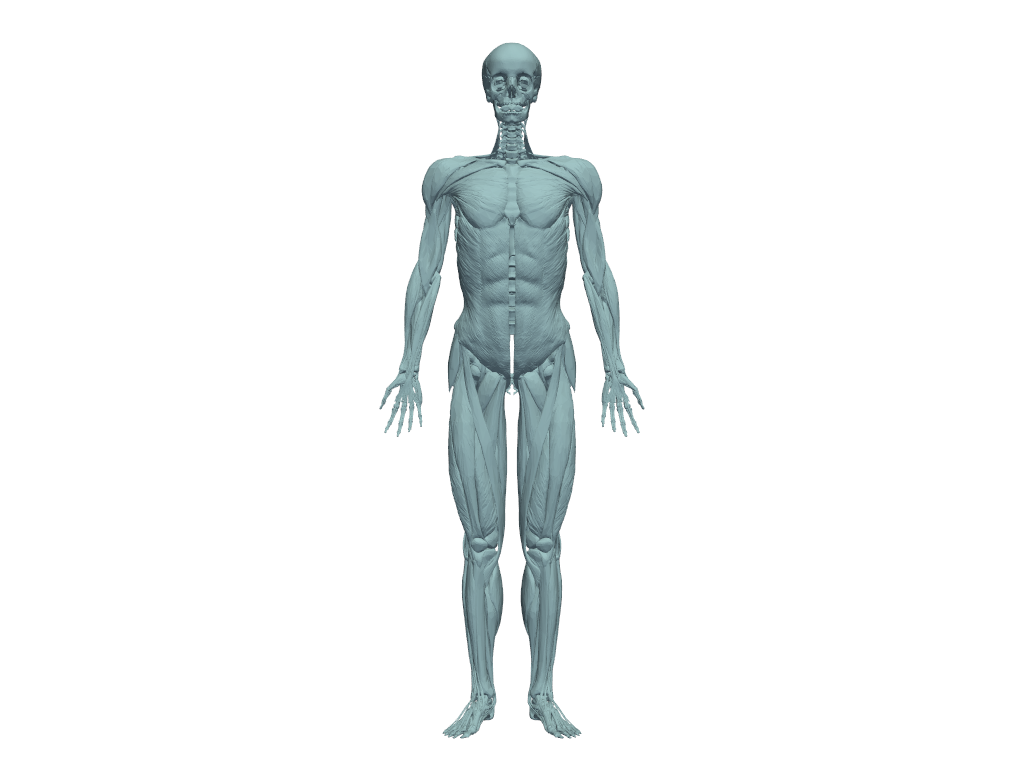

In [5]:
import pyvista as pv
import os

# Chemin vers ton dossier contenant les .obj
folder_path = "data/body"

# Crée une scène vide
plotter = pv.Plotter()
plotter.background_color = "white"

# Ajoute chaque fichier .obj à la scène
for filename in os.listdir(folder_path):
    if filename.endswith(".obj"):
        filepath = os.path.join(folder_path, filename)
        try:
            mesh = pv.read(filepath)
            plotter.add_mesh(mesh, name=filename, show_edges=False, opacity=1.0)
        except Exception as e:
            print(f"Erreur avec {filename}: {e}")

# Affiche la scène complète
plotter.view_vector((0, -1, 0))  # (x, y, z) — vue de face
plotter.show()

h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


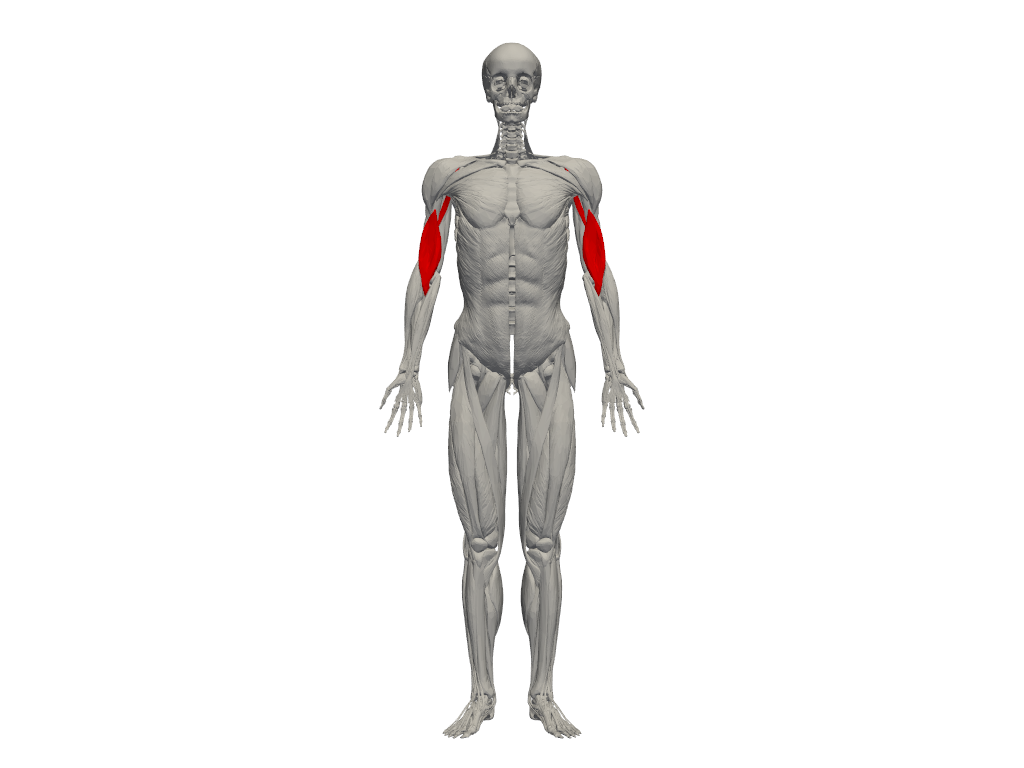

In [10]:
import pyvista as pv
import os

# Dossier des fichiers .obj
folder_path = "data/body"

# Création du plotter
plotter = pv.Plotter()
plotter.background_color = "white"

# Boucle sur tous les fichiers
for filename in os.listdir(folder_path):
    if filename.endswith(".obj"):
        filepath = os.path.join(folder_path, filename)
        try:
            mesh = pv.read(filepath)

            # 🎯 Mise en évidence : rouge si "pectoralis major" dans le nom
            if "brachialis" in filename.lower():
                color = "red"
                opacity = 1.0
            else:
                color = "lightgrey"
                opacity = 1.0

            # Ajout du mesh avec couleur personnalisée
            plotter.add_mesh(mesh, name=filename, color=color, show_edges=False, opacity=opacity)

        except Exception as e:
            print(f"Erreur avec {filename}: {e}")

# Positionner la vue de face
plotter.view_vector((0, -1, 0))

# Afficher la scène
plotter.show()

{'Sternocostal part of pectoralis major': 1.0, 'Abdominal part of pectoralis major': 0.9, 'Long head of triceps brachii': 0.8, 'Lateral head of triceps brachii': 0.8, 'Medial head of triceps brachii': 0.7, 'Clavicular part of deltoid': 0.7, 'Pectoralis minor': 0.6, 'Subscapularis': 0.5, 'Infraspinatus': 0.4, 'Teres minor': 0.4}


h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


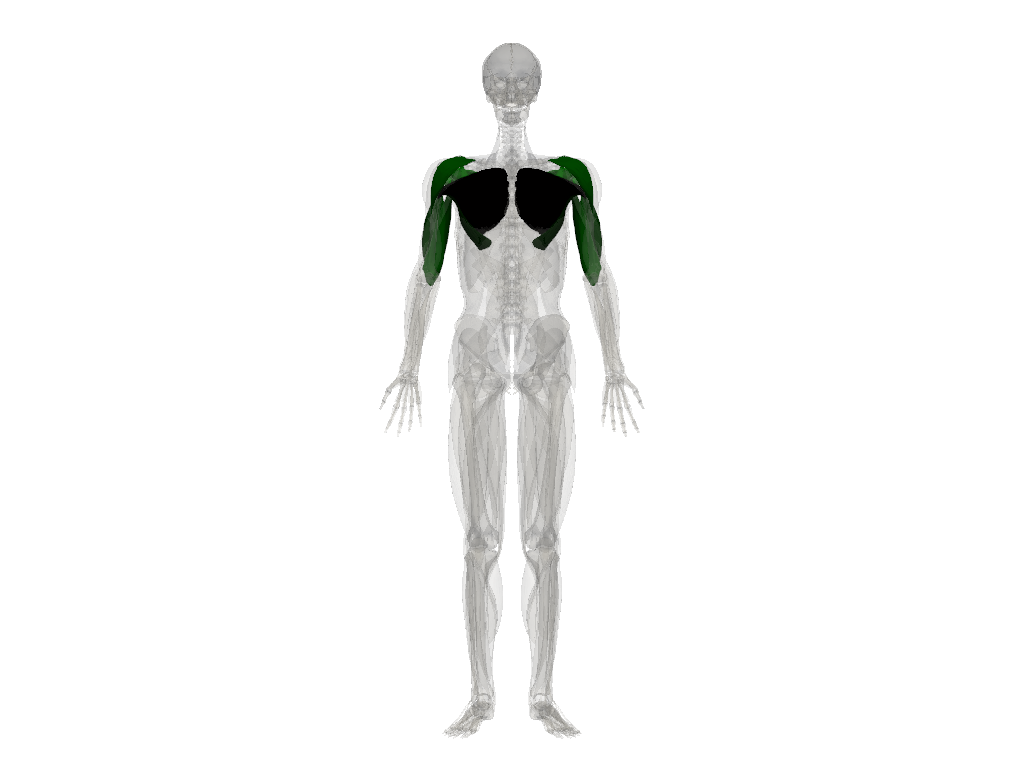

In [23]:
import pyvista as pv
import pandas as pd
import os

# === PARAMÈTRES ===
folder_path = "data/body"  # Dossier contenant les fichiers .obj
csv_path = "exercices_muscles_intensite.csv"  # CSV avec les exercices
selected_exercice = "Dips"  # 🔁 Change ici l’exercice que tu veux visualiser

# === Chargement des muscles ciblés par l'exercice ===
df = pd.read_csv(csv_path)
muscles = df[df["Exercice"] == selected_exercice][["Muscle", "Intensite"]]
muscles["Intensite"] = pd.to_numeric(muscles["Intensite"], errors="coerce")  # ← correction ici
muscles["Intensite_norm"] = muscles["Intensite"] / muscles["Intensite"].max()
muscle_map = {m: i for m, i in zip(muscles["Muscle"], muscles["Intensite_norm"])}
print(muscle_map)


# === Fonction couleur jaune → rouge ===
def get_color(intensity_norm):
    return (1, 1 - intensity_norm, 0)  # jaune (1,1,0) → rouge (1,0,0)

# === Création de la scène ===
plotter = pv.Plotter()
plotter.background_color = "white"

for file in os.listdir(folder_path):
    if file.endswith(".obj"):
        path = os.path.join(folder_path, file)
        try:
            mesh = pv.read(path)
            # On nettoie le nom
            muscle_name = (
                file.split("_")[-1]
                .replace(".obj", "")
                .replace("right ", "")
                .replace("left ", "")
                .strip()
            )

            matched = next((m for m in muscle_map if m.lower() in muscle_name.lower()), None)
            if matched:
                color = get_color(muscle_map[matched])
                opacity = 1.0
            else:
                color = "lightgrey"
                opacity = 0.1

            plotter.add_mesh(mesh, color=color, opacity=opacity)
        except Exception as e:
            print(f"Erreur avec {file} : {e}")

plotter.view_vector((0, -1, 0))
plotter.show()


h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


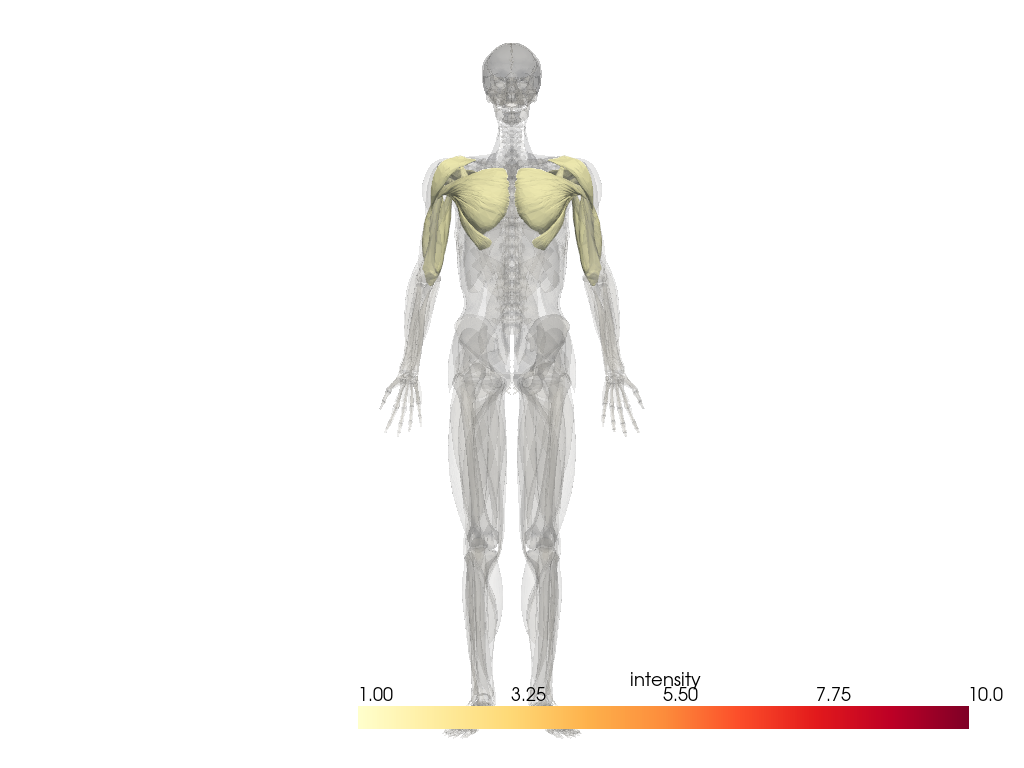

In [22]:
import pyvista as pv
import pandas as pd
import os
import numpy as np

# === PARAMÈTRES ===
folder_path = "data/body"
csv_path = "exercices_muscles_intensite.csv"
selected_exercice = "Dips"

# === Chargement des muscles ciblés par l'exercice ===
df = pd.read_csv(csv_path)
df["Intensite"] = pd.to_numeric(df["Intensite"], errors="coerce")
muscles = df[df["Exercice"] == selected_exercice][["Muscle", "Intensite"]]
muscles["Intensite_norm"] = muscles["Intensite"] / muscles["Intensite"].max()
muscle_map = {m: i for m, i in zip(muscles["Muscle"], muscles["Intensite_norm"])}

# === Fonction couleur jaune → rouge ===
def get_color(intensity_norm):
    return (1, 1 - intensity_norm, 0)

# === Création de la scène ===
plotter = pv.Plotter()
plotter.background_color = "white"

# Pour stocker les couleurs scalaires
scalars = []
mesh_ids = []

for file in os.listdir(folder_path):
    if file.endswith(".obj"):
        path = os.path.join(folder_path, file)
        try:
            mesh = pv.read(path)
            muscle_name = (
                file.split("_")[-1]
                .replace(".obj", "")
                .replace("right ", "")
                .replace("left ", "")
                .replace("Right ", "")
                .replace("Left ", "")
                .strip()
            )

            matched = next((m for m in muscle_map if m.lower() in muscle_name.lower()), None)
            if matched:
                norm_val = muscle_map[matched]
                mesh["intensity"] = np.full(mesh.n_points, norm_val * 10)  # 1 à 10
                plotter.add_mesh(
                    mesh,
                    scalars="intensity",
                    cmap="YlOrRd",
                    opacity=1,
                    show_scalar_bar=False
                )
            else:
                plotter.add_mesh(mesh, color="lightgrey", opacity=0.1)

        except Exception as e:
            print(f"Erreur avec {file} : {e}")

# === Ajout de la barre de couleur (échelle intensité) ===
# Fake mesh pour afficher la color bar
dummy = pv.Sphere()
dummy["intensity"] = np.linspace(1, 10, dummy.n_points)
plotter.add_mesh(dummy, scalars="intensity", cmap="YlOrRd", show_scalar_bar=True)
# plotter.add_scalar_bar(title="Intensité (1-10)", n_labels=5, shadow=True)

plotter.view_vector((0, -1, 0))
plotter.show()

h:\Documents\CY TECH Alternance\CY TECH 2024-2025\musculation\envMuscle\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


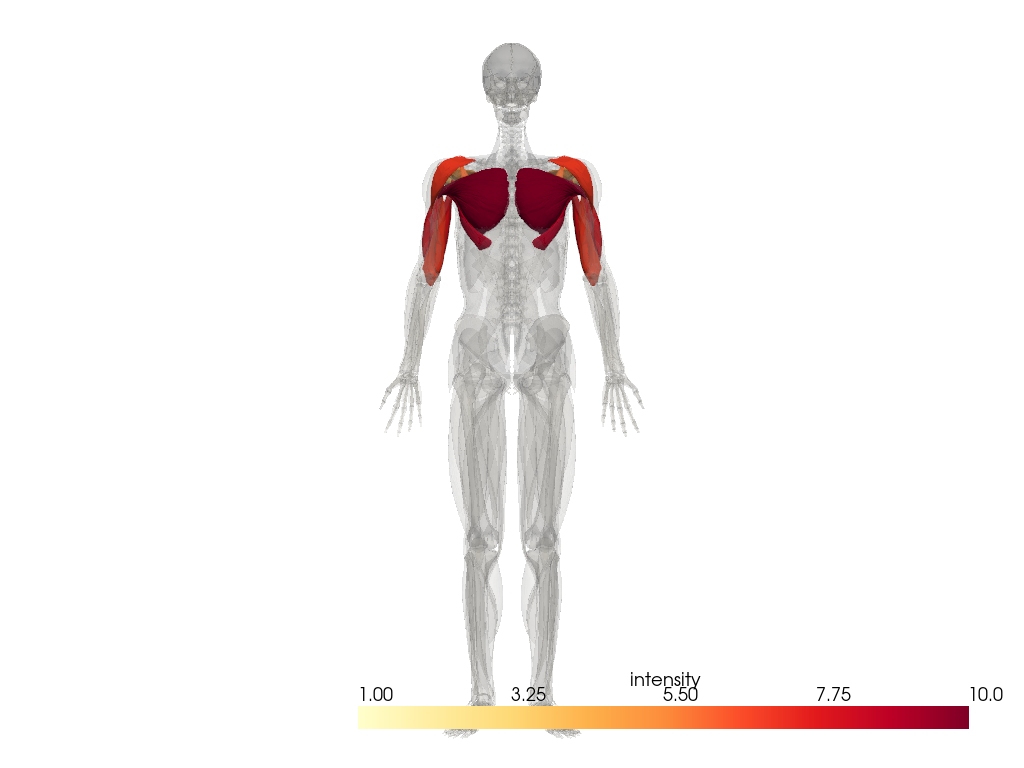

In [ ]:
import pyvista as pv
import pandas as pd
import os
import numpy as np

# === PARAMÈTRES ===
folder_path = "data/body"
csv_path = "exercices_muscles_intensite.csv"
selected_exercice = "Dips"

# === Chargement des muscles ciblés par l'exercice ===
df = pd.read_csv(csv_path)
df["Intensite"] = pd.to_numeric(df["Intensite"], errors="coerce")
muscles = df[df["Exercice"] == selected_exercice][["Muscle", "Intensite"]]
muscle_map = {m: int(i) for m, i in zip(muscles["Muscle"], muscles["Intensite"])}

# === Création de la scène ===
plotter = pv.Plotter()
plotter.background_color = "white"

# Pour stocker les valeurs d’intensité réelles (1-10)
for file in os.listdir(folder_path):
    if file.endswith(".obj"):
        path = os.path.join(folder_path, file)
        try:
            mesh = pv.read(path)
            muscle_name = (
                file.split("_")[-1]
                .replace(".obj", "")
                .replace("right ", "")
                .replace("left ", "")
                .replace("Right ", "")
                .replace("Left ", "")
                .strip()
            )

            matched = next((m for m in muscle_map if m.lower() in muscle_name.lower()), None)
            if matched:
                intensity = muscle_map[matched]
                mesh["intensity"] = np.full(mesh.n_points, intensity)
                plotter.add_mesh(
                    mesh,
                    scalars="intensity",
                    # cmap="YlOrRd",
                    cmap="Reds",
                    opacity=1.0,
                    show_scalar_bar=False,
                    clim=[1, 10]  # 🔥 fixe l'échelle
                )
            else:
                plotter.add_mesh(mesh, color="lightgrey", opacity=0.1)

        except Exception as e:
            print(f"Erreur avec {file} : {e}")

# === Barre de couleur ===
dummy = pv.Sphere()
dummy["intensity"] = np.linspace(1, 10, dummy.n_points)
plotter.add_mesh(dummy, scalars="intensity", cmap="YlOrRd", show_scalar_bar=True, clim=[1, 10])

plotter.view_vector((0, -1, 0))
plotter.show()